МИРЭК | 4 модуль

*Автор: Татьяна Рогович*

# Основы программирования в Python
## Домашнее задание 1

## Библиотека pandas

In [73]:
import pandas as pd
import seaborn as sns
from scipy.stats import norm

%matplotlib inline

Будем работать с датасетом Pima Indian Diabetes - это набор данных из Национального института диабета, болезней органов пищеварения и почек. Целью набора данных является диагностическое прогнозирование наличия диабета у пациента. Несколько ограничений были наложены на выбор этих экземпляров из большой базы данных. В частности, все пациенты здесь - женщины в возрасте от 21 года, индийского происхождения.

In [74]:
data = pd.read_csv('https://raw.githubusercontent.com/rogovich/2020_MIREC_PfDA/master/%40HW/1_HW/pima-indians-diabetes.csv')
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


Описание данных:

- __Pregnancies__ - данная единица отображает количество беременностей, единицы измерения - целые числа от 0 до N. Тип переменной - количественная, дискретная.
- __Glucose__ - данная единица отображает уровень глюкозы в крови, единицы измерения - целые числа. Тип переменной - количественная, дискретная.
- __BloodPressure__ - данная единица отображает артериальное давление, единицы измерения - миллиметры р/с, целые числа. Тип переменной - количественная, дискретная.
- __SkinThickness__ - данная единица отображает обхват трицепса в миллиметрах, целые числа. Тип переменной - количественная, дискретная.
- __Insulin__ - данная единица отображает уровень инсулина в крови, целые числа. Тип переменной - количественная, дискретная.
- __BMI__ - данная единица отображает индекс массы тела. Тип переменной - количественная, непрерывная.
- __DiabetesPedigreeFunction__ - данная единица отображает риск наследственного диабета в зависимости наличия диабета у родственников. Выражается десятичной дробью от 0 до 1. Тип переменной - количественная, непрерывная.
- __Age__ - данная единица отражает возраст в целых числах. Тип переменной - количественная, дискретная.
- __Class__ - данная единица отражает наличие диабета у субъекта, выражена 0(здоров) или 1(болен). Тип переменной - категориальная, бинарная.

__Задание 1. (0.5 балла)__

Как вы видите, в данных много пропусков (NaN). Любым способом посчитайте количество пропусков в каждом из столбцов (но мы должны видеть как вы это делали). 

Для тех переменных, в которых есть пропуске, выведите количество пропущенных значений в следующем формате:

"В переменной {название переменной} {количество} пропущенных значений"

In [75]:
print('В переменной Pregnancies ' + str(data['Pregnancies'].isnull().sum()) + ' пропущенных значений')
print('В переменной Glucose ' + str(data['Glucose'].isnull().sum()) + ' пропущенных значений')
print('В переменной BloodPressure ' + str(data['BloodPressure'].isnull().sum()) + ' пропущенных значений')
print('В переменной SkinThickness ' + str(data['SkinThickness'].isnull().sum()) + ' пропущенных значений')
print('В переменной BMI ' + str(data['BMI'].isnull().sum()) + ' пропущенных значений')
print('В переменной DiabetesPedigreeFunction ' + str(data['DiabetesPedigreeFunction'].isnull().sum()) + ' пропущенных значений')
print('В переменной Age ' + str(data['Age'].isnull().sum()) + ' пропущенных значений')
print('В переменной Class ' + str(data['Class'].isnull().sum()) + ' пропущенных значений')

В переменной Pregnancies 0 пропущенных значений
В переменной Glucose 5 пропущенных значений
В переменной BloodPressure 35 пропущенных значений
В переменной SkinThickness 227 пропущенных значений
В переменной BMI 11 пропущенных значений
В переменной DiabetesPedigreeFunction 0 пропущенных значений
В переменной Age 0 пропущенных значений
В переменной Class 0 пропущенных значений


__Задание 2. (1 балл)__

Замените все пропуски дискретных признаков соответствующими медианами, непрерывных признаков - средними значениями.

In [76]:
data['Pregnancies'] = data['Pregnancies'].fillna(data['Pregnancies'].median())
data['Glucose'] = data['Glucose'].fillna(data['Glucose'].median())
data['BloodPressure'] = data['BloodPressure'].fillna(data['BloodPressure'].median())
data['SkinThickness'] = data['SkinThickness'].fillna(data['SkinThickness'].median())
data['BMI'] = data['BMI'].fillna(data['BMI'].mean())
data['DiabetesPedigreeFunction'] = data['DiabetesPedigreeFunction'].fillna(data['DiabetesPedigreeFunction'].median())
data['Age'] = data['Age'].fillna(data['Age'].median())

data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,29.0,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,NaN,30.1,0.349,47,1


__Задание 3. (0.25 балла)__

Выведите основные статистики (минимум, максимум, среднее, дисперсию, квантили) для всех столбцов.

In [77]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,394.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,118.775855,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


__Задание 4. (0.25 балла)__

У скольких женщин старше 50 лет обнаружен диабет?

In [78]:
data[(data.Age > 50) & (data.Class == 1)].index.size

38

__Задание 5. (0.25 балла)__

Найдите трех женщин с наибольшими числом беременностей.

In [79]:
data.sort_values(by=['Pregnancies']).tail(n=3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
455,14,175.0,62.0,30.0,NaN,33.6,0.212,38,1
88,15,136.0,70.0,32.0,110.0,37.1,0.153,43,1
159,17,163.0,72.0,41.0,114.0,40.9,0.817,47,1


__Задание 6. (0.25 балла)__

Сколько женщин успели родить 3 или более детей до 30 лет?

In [80]:
data[(data.Pregnancies > 2) & (data.Age < 30)].index.size

117

__Задание 7. (1 балл)__

Нормальным кровяным давлением будем считать давление в диапазоне [80-89]. У какого процента женщин давление нормальное?

In [81]:
data[(data.BloodPressure <= 89) & (data.BloodPressure >= 80)].index.size / data.index.size * 100

18.880208333333336

__Задание 8. (1 балл)__

Считается, что BMI >= 30 - это признак ожирения. 
У скольких женщин с признаками ожирения кровяное давление выше среднего?

In [82]:
data[(data.BMI >= 30) & (data.BloodPressure > 89)].index.size

45

__Задание 9. (1 балл)__

Сравните средние значения для признаков __Glucose,	BloodPressure,	Insulin__ среди тех, у кого обнаружен диабет, и тех, у кого его нет. 

In [83]:
print('Глюкоза: ', data[data.Class == 0].Glucose.mean(), ' / ', data[data.Class == 1].Glucose.mean())

Глюкоза:  110.682  /  142.13059701492537


In [84]:
print('Инсулин: ', data[data.Class == 0].Insulin.mean(), ' / ', data[data.Class == 1].Insulin.mean())

Инсулин:  130.28787878787878  /  206.84615384615384


In [85]:
print('Кровяное давление: ', data[data.Class == 0].BloodPressure.mean(), ' / ', data[data.Class == 1].BloodPressure.mean())

Кровяное давление:  70.92  /  75.1231343283582


__Задание 10. (0.5 балла)__

Постройте круговую диаграмму для признака __Class__.

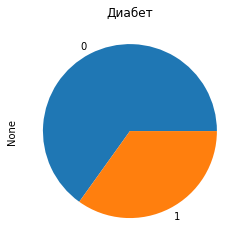

In [86]:
data.groupby(data.Class).size().plot(kind='pie', title='Диабет')

__Задание 11. (0.5 балла)__

Постройте распределение для признака __BMI__ и сравните его с нормальным (напишите вывод в новой markdown-ячейке под графиками)

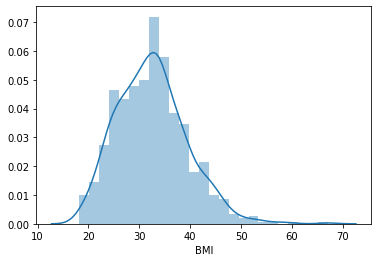

In [87]:
sns.distplot(data['BMI'])

In [88]:
Распределение близко к нормальному

SyntaxError: invalid syntax (<ipython-input-88-be567c8aaefc>, line 1)

__Задание 12. (1 балл)__

Постройте следующий график: процент больных диабетом в зависимости от числа беременностей.

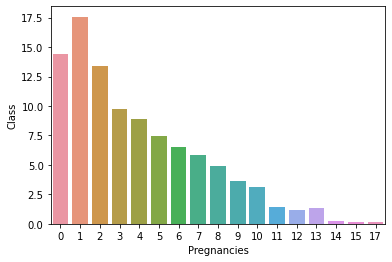

In [89]:
sns.barplot(data.Pregnancies, data.Class, estimator=lambda x: len(x) / len(data) * 100)

__Задание 13. (0.5 балла)__

Добавьте новый бинарный признак:

__wasPregnant__ $\in$ {0,1} - была женщина беременна (1) или нет (0)

In [90]:
def wasPregnant(x):
    if x > 0:
        return 1
    return 0

data['wasPregnant'] = data.Pregnancies.apply(wasPregnant)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,wasPregnant
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,1
2,8,183.0,64.0,29.0,NaN,23.3,0.672,32,1,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0
...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,1
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0,1
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,1
766,1,126.0,60.0,29.0,NaN,30.1,0.349,47,1,1


__Задание 14. (0.5 балла)__

Сравните процент больных диабетом среди женщин, которые были беременны и не были.

In [91]:
print('Были: ', str(data[(data['Class'] == 1) & (data['wasPregnant'] == 1)].index.size / data[data['wasPregnant'] == 1].index.size * 100), '%')
print('Не были: ', str(data[(data['Class'] == 1) & (data['wasPregnant'] == 0)].index.size / data[data['wasPregnant'] == 0].index.size * 100), '%')

Были:  35.0076103500761 %
Не были:  34.234234234234236 %


__Задание 15. (1 балл)__

Добавьте новый категориальный признак __bodyType__ на основе столбца BMI:

__BMI Categories:__ 

Underweight = <18.5

Normal weight = 18.5–24.9 

Overweight = 25–29.9 

Obesity = BMI of 30 or greater

Признак должен принимать значения Underweight, Normal weight, Overweight и Obesity.

In [92]:
def f(bmi):
    if bmi >= 30:
        return 'Obesity'
    if 25 <= bmi < 29.9:
        return 'Overweight'
    if 18.5 <= bmi < 24.9:
        return 'Normal'
    return 'Underweight'

data['bodyType'] = data['BMI'].apply(f)

data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,wasPregnant,bodyType
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,1,Obesity
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,1,Overweight
2,8,183.0,64.0,29.0,NaN,23.3,0.672,32,1,1,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1,Overweight
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,Obesity
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,1,Obesity
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0,1,Obesity
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,1,Overweight
766,1,126.0,60.0,29.0,NaN,30.1,0.349,47,1,1,Obesity


__Задание 16. (0.5 балла)__

Будем считать "здоровыми" тех, у кого нормальный вес и кровяное давление. Какой процент "здоровых" женщин больны диабетом?

In [93]:
a = data[(data.bodyType == 'Normal') & (data.BloodPressure >= 80) & (data.BloodPressure <= 89)].index.size
b = data[(data.bodyType == 'Normal') & (data.BloodPressure >= 80) & (data.BloodPressure <= 89) & (data['Class'])].index.size
print(b/a * 100, '%')

10.0 %
